# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daigt-proper-train-dataset/train_drcat_03.csv
/kaggle/input/daigt-proper-train-dataset/train_drcat_02.csv
/kaggle/input/daigt-proper-train-dataset/train_drcat_04.csv
/kaggle/input/daigt-proper-train-dataset/train_drcat_01.csv
/kaggle/input/llm-detect-ai-generated-text/sample_submission.csv
/kaggle/input/llm-detect-ai-generated-text/train_prompts.csv
/kaggle/input/llm-detect-ai-generated-text/test_essays.csv
/kaggle/input/llm-detect-ai-generated-text/train_essays.csv


In [2]:
org_data = pd.read_csv("/kaggle/input/llm-detect-ai-generated-text/train_essays.csv")
new_data = pd.read_csv("/kaggle/input/daigt-proper-train-dataset/train_drcat_02.csv")

# preprocessing

In [3]:
org_data = org_data[["text", "generated"]]
org_data

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0
...,...,...
1373,There has been a fuss about the Elector Colleg...,0
1374,Limiting car usage has many advantages. Such a...,0
1375,There's a new trend that has been developing f...,0
1376,As we all know cars are a big part of our soci...,0


generated
0    1375
1       3
Name: count, dtype: int64


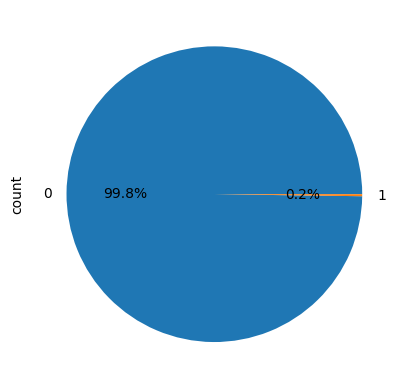

In [4]:
# Calculate the value counts of the "generated" column in the original data
org_data_generated_counts = org_data["generated"].value_counts()

# Print the value counts of the original data
print(org_data_generated_counts)

# Plot a pie chart of the value counts of the original data with percentage labels
org_data_generated_counts.plot.pie(autopct='%1.1f%%');

In [5]:
new_data = new_data[["text", "label"]].rename(columns={'text':'text', 'label':'generated'})
new_data

,text,generated
0,"Okay, here is my essay:\n\nWorking or doing th...",1
1,"Dear Principal,\r\n\r\nI just want to let you ...",0
2,I believe they should change the voting to pop...,0
3,One example of an inspiring individual who has...,1
4,"Dear Mr. Principal,\n\nI believe that students...",0
...,...,...
39780,"""Oh man I didn't make the soccer team!"", yelle...",0
39781,I believe that using this technology could be ...,0
39782,The Face on Mars is a fascinating phenomenon t...,1
39783,Texting & Driving\n\nUsing your phone while dr...,0


In [6]:
org_data.drop_duplicates(subset=['text'], inplace=True), new_data.drop_duplicates(subset=['text'], inplace=True)

(None, None)

In [7]:
positive = new_data.loc[new_data['generated'] == 1]
positive

,text,generated
0,"Okay, here is my essay:\n\nWorking or doing th...",1
3,One example of an inspiring individual who has...,1
6,"""As a high school student, I have witnessed th...",1
11,Video games have been a popular form of entert...,1
13,Group work is an essential part of life; it ca...,1
...,...,...
39767,Sure thing! Here's my attempt at writing an es...,1
39770,I think our principal's idea of making us do e...,1
39771,I think it's a good idea for schools to have o...,1
39778,Advantages of Limiting Car Usage\n\nLimiting c...,1


In [8]:
negative = new_data.loc[new_data['generated'] == 0]
negative

,text,generated
1,"Dear Principal,\r\n\r\nI just want to let you ...",0
2,I believe they should change the voting to pop...,0
4,"Dear Mr. Principal,\n\nI believe that students...",0
5,I think that this image of this face is very n...,0
7,"Dear Principle,\n\nI sincerely hope you will n...",0
...,...,...
39779,Are driverless cars really necessary? Most of ...,0
39780,"""Oh man I didn't make the soccer team!"", yelle...",0
39781,I believe that using this technology could be ...,0
39783,Texting & Driving\n\nUsing your phone while dr...,0


In [9]:
text_overlap_of_positive = positive["text"].isin(org_data["text"])
print(text_overlap_of_positive.sum())

positive = positive[~text_overlap_of_positive]

3


In [10]:
text_overlap_of_negative = negative["text"].isin(org_data["text"])
print(text_overlap_of_negative.sum())

negative = negative[~text_overlap_of_negative]

1375


In [11]:
augmented_data  = pd.concat([org_data, positive, negative.sample(8618)])
augmented_data  = augmented_data .sample(frac=1).reset_index(drop=True)
augmented_data 

,text,generated
0,I believe that dress codes can be beneficial t...,1
1,"As an 8th grader, I have to say that social me...",1
2,"""Can you imagine a time in the future when no ...",0
3,Ralph Waldo Emerson’s quote “To be in a world ...,1
4,Electoral college should go away. electoral co...,0
...,...,...
19981,A four-day school week is a concept that has b...,1
19982,"Dear Principal,\n\nI don't think this is a goo...",0
19983,In a time where technology is creating more an...,0
19984,Transportation is the second largest source of...,0


generated
1    9993
0    9993
Name: count, dtype: int64


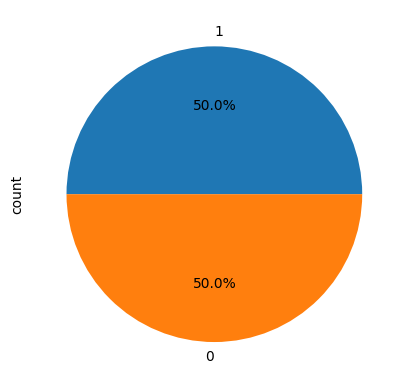

In [12]:
# Calculate the counts of each unique value in the "generated" column of augmented data
augmented_generated_value_counts = augmented_data["generated"].value_counts()

# Print the augmented generated value counts
print(augmented_generated_value_counts)

# Plot a pie chart of the augmented generated value counts with percentage labels
augmented_generated_value_counts.plot.pie(autopct='%1.1f%%');

In [13]:
X, y = augmented_data ["text"], augmented_data ["generated"]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, stratify=y)

# training models : binary text classification

In [15]:
import matplotlib.pyplot as plt
from torchtext.data.utils import get_tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, roc_curve, auc
import time

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [17]:
vectorizer = TfidfVectorizer(tokenizer=get_tokenizer("basic_english"), token_pattern=None)

def vectorize_text(X_train, X_val):
    """
    Vectorizes the text data using TF-IDF.
    """
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_val_vectorized = vectorizer.transform(X_val)
    return X_train_vectorized, X_val_vectorized

In [18]:
def evaluate_model(model, X_val, y_val):
    """
    Evaluates the trained model on the validation data and returns classification report.
    """
    predictions = model.predict(X_val)
    report = classification_report(y_val, predictions)
    return report

In [19]:
def plot_roc_auc(model, X_val, y_val, ax):
    """
    Plots the ROC curve for a given model.

    Parameters:
    model : object
        The trained classification model.
    X_val : array-like or sparse matrix, shape (n_samples, n_features)
        Validation data.
    y_val : array-like, shape (n_samples,)
        True binary labels in range {0, 1} or {-1, 1}.
    ax : matplotlib Axes object
        The axes to plot the ROC curve on.

    Returns:
    None
    """
    # Predict probabilities
    y_score = model.predict_proba(X_val)[:, 1]
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_val, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    ax.plot(fpr, tpr, lw=2, label='%s (area = %0.2f)' % (type(model).__name__, roc_auc))
    
    return ax

LogisticRegression is trained in 3.0872209072113037 seonds
RandomForestClassifier is trained in 22.876126766204834 seonds


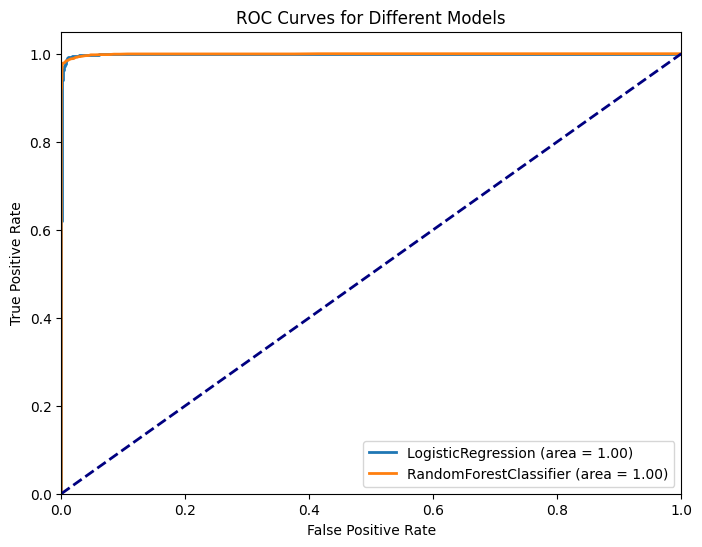

In [20]:
X_train_vectorized, X_val_vectorized = vectorize_text(X_train, X_val)

models = [LogisticRegression(), RandomForestClassifier()]
model_reports = {}

fig, ax = plt.subplots(figsize=(8, 6))

for model in models:
    start = time.time()
    model.fit(X_train_vectorized, y_train)
    end = time.time()
    ax = plot_roc_auc(model, X_val_vectorized, y_val, ax)
    report = evaluate_model(model, X_val_vectorized, y_val)
    model_name = type(model).__name__
    model_reports[model_name] = report
    print(f'{model_name} is trained in {end-start} seonds')

ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves for Different Models')
ax.legend(loc="lower right")
plt.show();

In [21]:
# print classification reports
for model_name, report in model_reports.items():
    print(f"Classification Report for {model_name}:\n{report}\n")

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1999
           1       0.99      0.99      0.99      1999

    accuracy                           0.99      3998
   macro avg       0.99      0.99      0.99      3998
weighted avg       0.99      0.99      0.99      3998


Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1999
           1       0.99      0.98      0.99      1999

    accuracy                           0.99      3998
   macro avg       0.99      0.99      0.99      3998
weighted avg       0.99      0.99      0.99      3998


